In [19]:
import os
import matplotlib.pyplot as plt
from src.data.dataset_blond import BLOND
from src.data.dataset_blond import TYPE_CLASS
from src.features.features import *
import pandas as pd
import numpy as np
import librosa
import seaborn as sns

In [20]:
class_dict = {
    'Battery Charger': 0,
    'Daylight': 1,
    'Dev Board': 2,
    'Fan': 3,
    'Kettle': 4,
    'Laptop': 5,
    'Monitor': 6,
    'PC': 7,
    'Printer': 8,
    'Projector': 9,
    'Screen Motor': 10,
    'USB Charger': 11,
}

dataset = BLOND('all', '../data/', class_dict=class_dict)
dataset.labels

,Medal,Socket,Appliance,Type,Timestamp,fold,synthetic,Class,Weight
0,1,4,Dell U2713Hb,Monitor,2016-10-04 08_48_14.591904+02_00,train,0,6.0,1.651279
1,1,4,Dell U2713Hb,Monitor,2016-10-04 11_19_29.528961+02_00,test,0,6.0,1.651279
2,1,6,MacBook Pro 13'' Mid-2014,Laptop,2016-10-14 10_51_33.420410+02_00,val,0,5.0,5.088520
3,14,6,Lenovo L540,Laptop,2016-10-05 10_52_25.166016+02_00,train,0,5.0,5.088520
4,15,3,Apple MD813ZM,USB Charger,2016-10-05 15_20_46.083069+02_00,train,0,11.0,20.036530
...,...,...,...,...,...,...,...,...,...
13191,1,3,Kraftmax BC4000 Pro,Battery Charger,2017-03-01 12_43_20.383691+01_00,train,0,0.0,30.974117
13192,1,3,Kraftmax BC4000 Pro,Battery Charger,2017-03-01 11_37_51.305780+01_00,train,0,0.0,30.974117
13193,1,3,Kraftmax BC4000 Pro,Battery Charger,2017-03-01 11_37_37.000685+01_00,train,0,0.0,30.974117
13194,1,3,Kraftmax BC4000 Pro,Battery Charger,2017-03-01 11_38_05.642500+01_00,train,0,0.0,30.974117


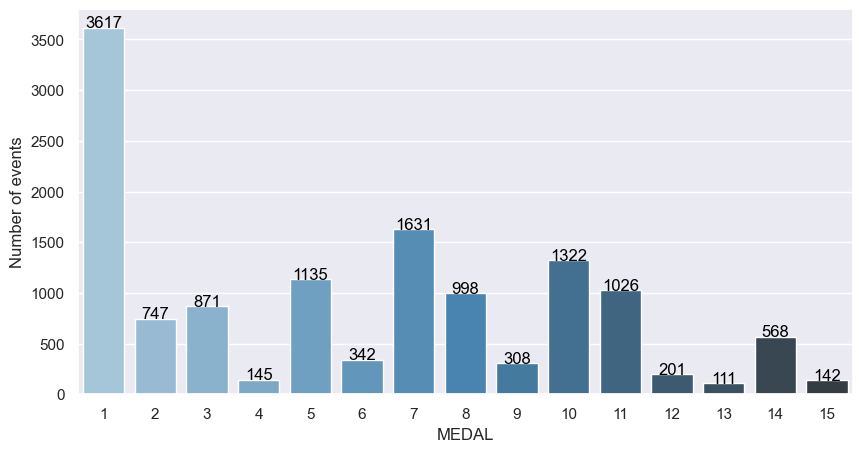

In [21]:
sns.set(rc={'figure.figsize':(10,5)})
tmp = dataset.labels.groupby(['Medal']).count()
df = pd.DataFrame({
'MEDAL': tmp.index,
'Number of events': tmp['Socket'].values,
})
#plt.title('Number of events per MEDAL')
ax = sns.barplot(x='MEDAL', y='Number of events', data=df, palette="Blues_d")

for index, row in df.iterrows():
    ax.text(row.name, row.values[1], row.values[1], color='black', ha="center")

plt.savefig('figures/number_of_events_per_medal.svg', dpi=300, bbox_extra_artists=(ax,), bbox_inches='tight')
plt.show()

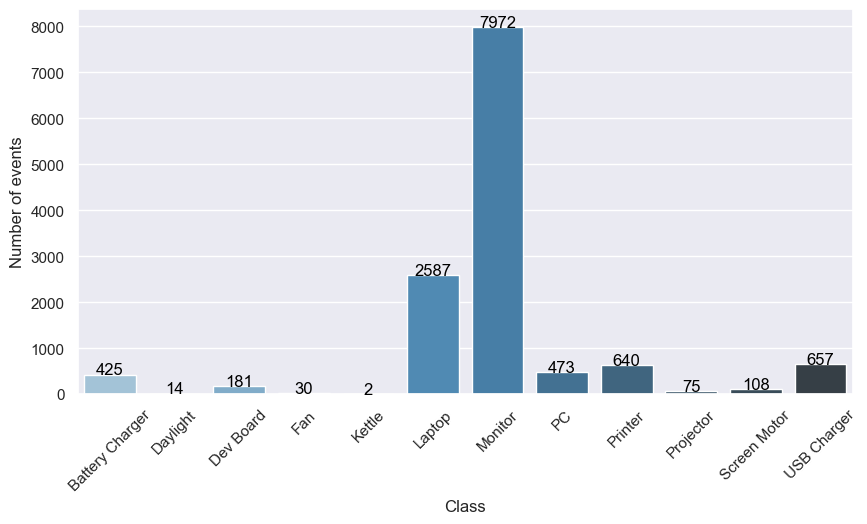

In [22]:
tmp = dataset.labels.groupby(['Type']).count()
df = pd.DataFrame({
'Class': tmp.index,
'Number of events': tmp['Medal'].values,
})
#plt.title('Number of events per class')
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.barplot(x='Class', y='Number of events', data=df, palette="Blues_d")

for index, row in df.iterrows():
    ax.text(row.name, row.values[1], row.values[1], color='black', ha="center")

for item in ax.get_xticklabels():
    item.set_rotation(45)

plt.savefig('figures/number_of_events_per_class.svg', dpi=300, bbox_extra_artists=(ax,), bbox_inches='tight')
plt.show()

In [ ]:
sns.set(rc={'figure.figsize':(10,5)})
tmp =dataset.labels.groupby(['Medal', 'Type']).count()
plt.figure(figsize=(12, 12))
#plt.suptitle('Number of events per MEDAL and Class')

color_map = {
    'Battery Charger': 'C4',
    'Daylight': 'C3',
    'Dev Board': 'C2',
    'Fan': 'C6',
    'Kettle': 'tab:purple',
    'Laptop': 'C1',
    'Monitor': 'C0',
    'PC': 'C5',
    'Printer': 'C8',
    'Projector': 'C9',
    'Screen Motor': 'bisque',
    'USB Charger': 'C7',
}

for i in range(0, 5):
    for idx in tmp.index:

        appliance = idx[1]
        color = color_map[appliance]
        if idx[1] == 'Screen Motor':
            appliance = 'Screen \n Motor'

        if int(idx[0]) == i * 3 + 1:
            plt.subplot(5, 3, i * 3 + 1)

            plt.bar(x=appliance, height=tmp[tmp.index==idx]['Socket'], color=color)
            plt.title(f'Medal {i * 3 + 1}')

        if int(idx[0]) == i * 3 + 2:
            plt.subplot(5, 3, i * 3 + 2)
            plt.bar(x=appliance, height=tmp[tmp.index==idx]['Socket'], color=color)
            plt.title(f'Medal {i * 3 + 2}')

        if int(idx[0]) == i * 3 + 3:
            plt.subplot(5, 3, i * 3 + 3)
            plt.bar(x=appliance, height=tmp[tmp.index==idx]['Socket'], color=color)
            plt.title(f'Medal {i * 3 + 3}')

plt.tight_layout()
plt.savefig('figures/events_per_medal.svg', dpi=300)
plt.show()

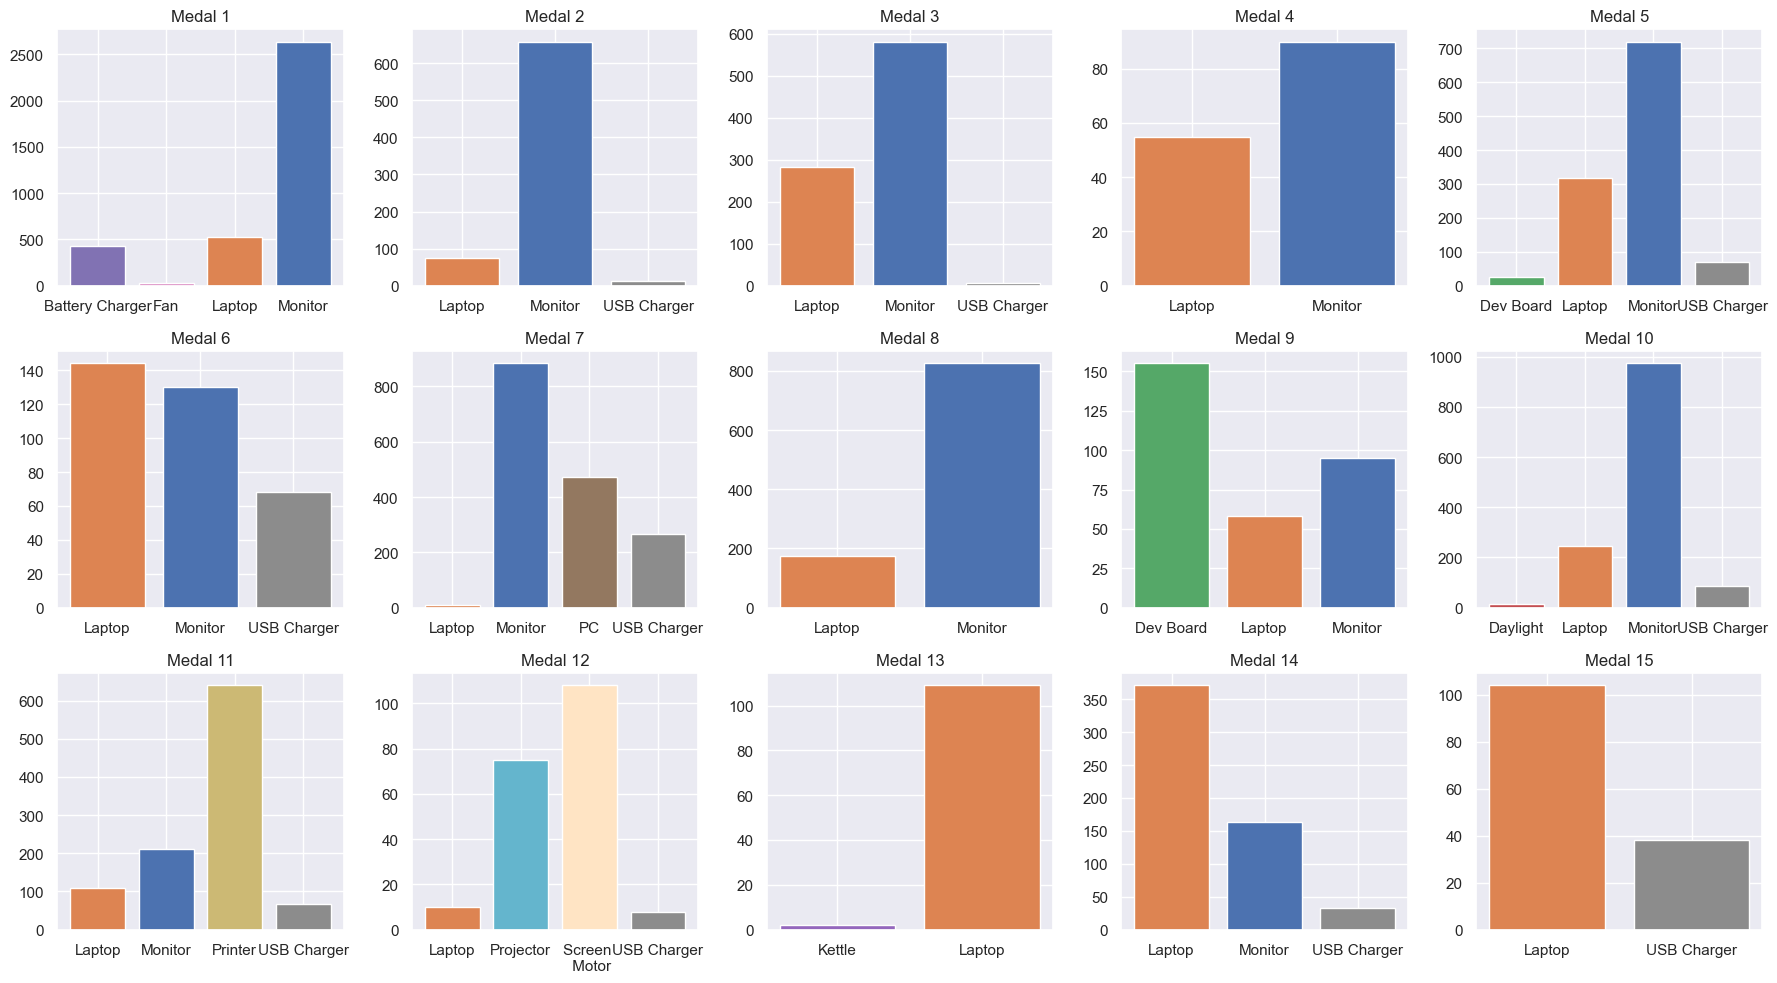

In [48]:
sns.set(rc={'figure.figsize':(10,5)})
tmp =dataset.labels.groupby(['Medal', 'Type']).count()
plt.figure(figsize=(18, 10))

for i in range(0, 3):
    for idx in tmp.index:

        appliance = idx[1]
        color = color_map[appliance]
        if idx[1] == 'Screen Motor':
            appliance = 'Screen \n Motor'

        if int(idx[0]) == i * 5 + 1:
            plt.subplot(3, 5, i * 5 + 1)

            plt.bar(x=appliance, height=tmp[tmp.index==idx]['Socket'], color=color)
            plt.title(f'Medal {i * 5 + 1}')

        if int(idx[0]) == i * 5 + 2:
            plt.subplot(3, 5, i * 5 + 2)
            plt.bar(x=appliance, height=tmp[tmp.index==idx]['Socket'], color=color)
            plt.title(f'Medal {i * 5 + 2}')

        if int(idx[0]) == i * 5 + 3:
            plt.subplot(3, 5, i * 5 + 3)
            plt.bar(x=appliance, height=tmp[tmp.index==idx]['Socket'], color=color)
            plt.title(f'Medal {i * 5 + 3}')

        if int(idx[0]) == i * 5 + 4:
            plt.subplot(3, 5, i * 5 + 4)
            plt.bar(x=appliance, height=tmp[tmp.index==idx]['Socket'], color=color)
            plt.title(f'Medal {i * 5 + 4}')

        if int(idx[0]) == i * 5 + 5:
            plt.subplot(3, 5, i * 5 + 5)
            plt.bar(x=appliance, height=tmp[tmp.index==idx]['Socket'], color=color)
            plt.title(f'Medal {i * 5 + 5}')


plt.tight_layout()
plt.savefig('figures/events_per_medal.png', dpi=300)
plt.show()

In [24]:
num_examples = 4
idx = np.random.choice(len(dataset), size=num_examples, replace=False)
class_type = {v: k for k, v in TYPE_CLASS.items()}
ix = 8000

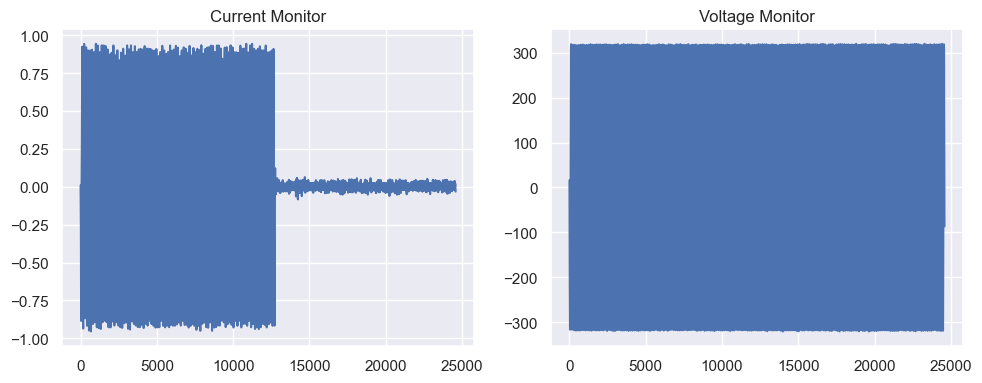

In [25]:
plt.figure(figsize=(10, 4))
#plt.suptitle('Voltage & Current waves')

current, voltage, class_nr = dataset[ix]

plt.subplot(1, 2, 1)
plt.plot(current)
plt.title(f'Current {class_type[class_nr]}')

plt.subplot(1, 2, 2)
plt.plot(voltage)
plt.title(f'Voltage {class_type[class_nr]}')

plt.tight_layout()
plt.show()

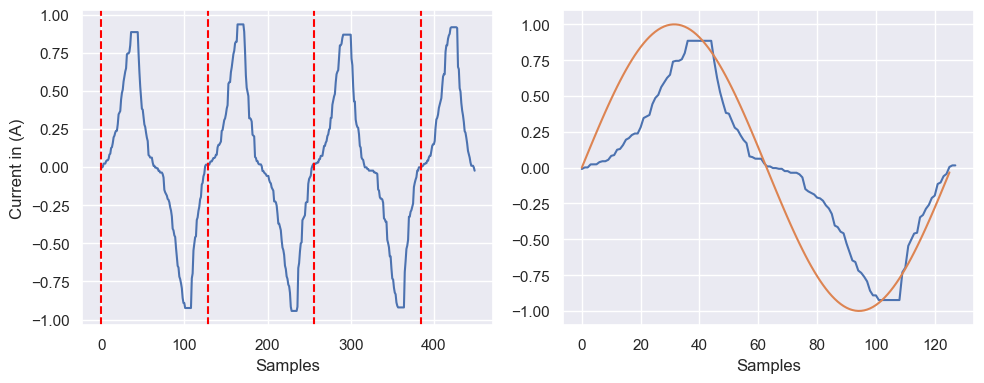

In [26]:
plt.figure(figsize=(10, 4))
sin_curve = np.sin(np.arange(0,2*np.pi,0.05))

len_window = 450

current, voltage, class_nr = dataset[ix]
#plt.suptitle('Visualization of current cycles on an monitor event')
plt.subplot(1,2,1)
plt.plot(current[:len_window]*-1)
xposition = np.arange(int(len_window/128+1))*128
for xc in xposition:
    plt.axvline(x=xc, color='red', linestyle='--')
plt.xlabel('Samples')
plt.ylabel('Current in (A)')
plt.subplot(1, 2, 2)
plt.plot(current[:128]*-1)
plt.plot(sin_curve)
plt.xlabel('Samples')

plt.tight_layout()
plt.savefig('figures/cycles.svg', dpi = 300)
plt.show()

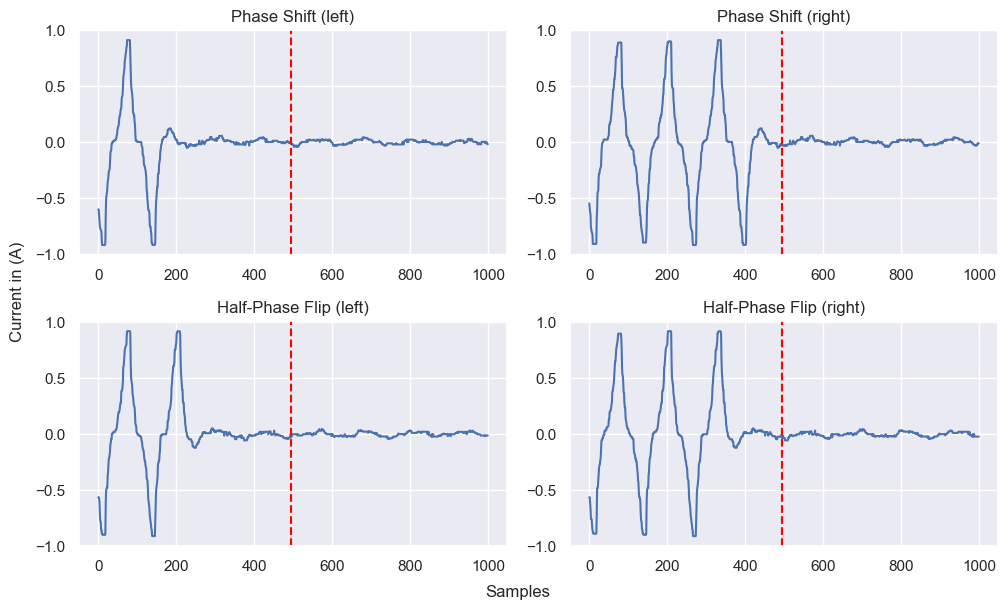

In [27]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
#plt.suptitle(f'Augmentations on a monitor event')

sample = dataset[ix]
aug = RandomAugment(augment_i=0)
current, _, _, class_nr = aug((sample[0], sample[1], None, sample[2]))
idx_0 = int(len(current) / 2) + 150
idx_1 = idx_0 + 1000

axes[0, 0].plot(current[idx_0:idx_1])
axes[0, 0].set_title('Phase Shift (left)')
axes[0, 0].axvline(x=495, color='red', linestyle='--')

aug = RandomAugment(augment_i=1)
current, _, _, class_nr = aug((sample[0], sample[1], None, sample[2]))
axes[0, 1].plot(current[idx_0:idx_1])
axes[0, 1].set_title('Phase Shift (right)')
axes[0, 1].axvline(x=495, color='red', linestyle='--')

aug = RandomAugment(augment_i=2)
current, _, _, class_nr = aug((sample[0], sample[1], None, sample[2]))
axes[1, 0].plot(current[idx_0:idx_1])
axes[1, 0].set_title('Half-Phase Flip (left)')
axes[1, 0].axvline(x=495, color='red', linestyle='--')

aug = RandomAugment(augment_i=3)
current, _, _, class_nr = aug((sample[0], sample[1], None, sample[2]))
axes[1, 1].plot(current[idx_0:idx_1])
axes[1, 1].set_title('Half-Phase Flip (right)')
axes[1, 1].axvline(x=495, color='red', linestyle='--')

fig.text(0.5, 0, 'Samples', ha='center', va='center')
fig.text(0.0, 0.5, 'Current in (A)', ha='center', va='center', rotation='vertical')

plt.tight_layout()
plt.savefig('figures/augmentation.svg', dpi = 300, bbox_extra_artists=(fig,), bbox_inches='tight')
plt.show()

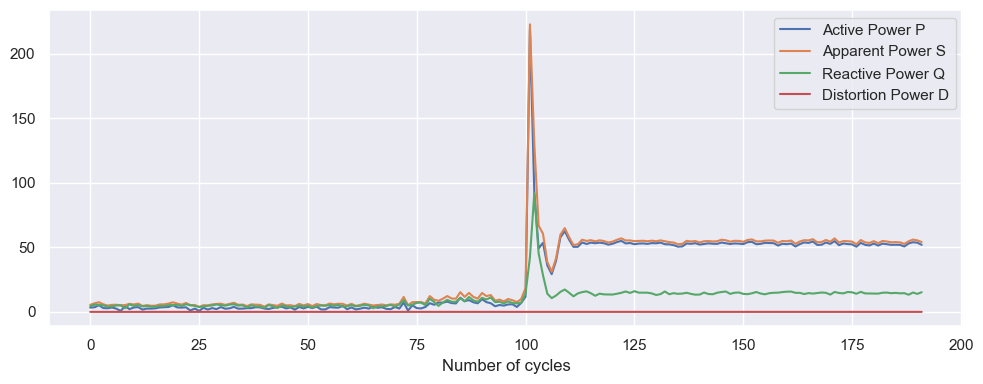

In [28]:
ix = 7998
ac = ACPower()

plt.figure(figsize=(10, 4))

sample = dataset[ix]

_, _, features, class_nr = ac((sample[0], sample[1], None, sample[2]))
#plt.title(f'AC power features')
plt.plot(features[0], label='Active Power P')
plt.plot(features[1], label='Apparent Power S')
plt.plot(features[2], label='Reactive Power Q')
plt.plot(features[3], label='Distortion Power D')
plt.xlabel('Number of cycles')
plt.legend()

plt.tight_layout()
plt.savefig('figures/ac.svg', dpi = 300)
plt.show()

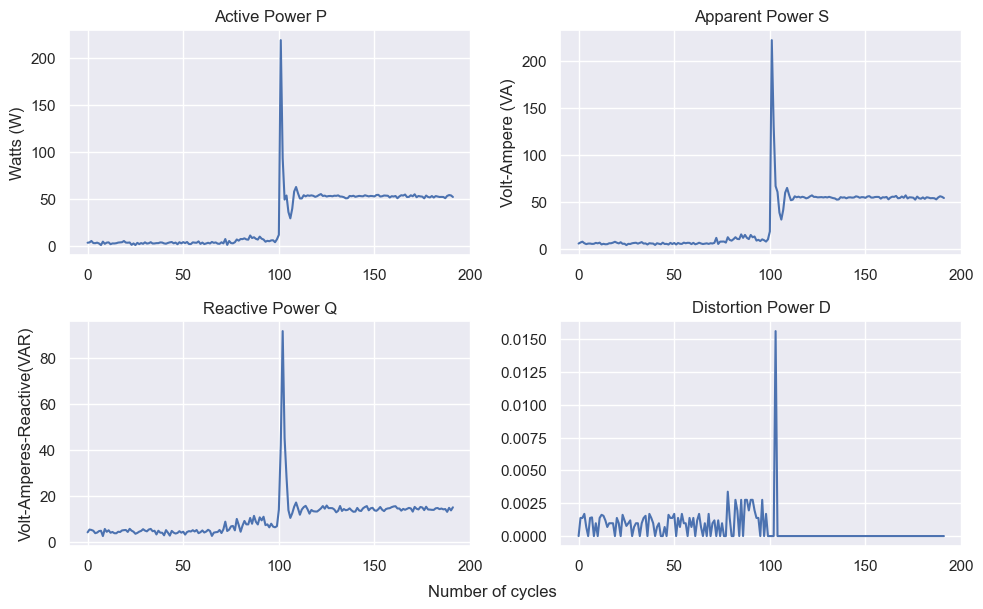

In [29]:
ac = ACPower()
sample = dataset[ix]
_, _, features, class_nr = ac((sample[0], sample[1], None, sample[2]))

fig, axes = plt.subplots(2, 2, figsize=(10, 6))
#plt.suptitle(f'AC power features')

sample = dataset[ix]

axes[0, 0].plot(features[0])
axes[0, 0].set_title('Active Power P')
axes[0, 0].set_ylabel('Watts (W)')

axes[0, 1].plot(features[1])
axes[0, 1].set_title('Apparent Power S')
axes[0, 1].set_ylabel('Volt-Ampere (VA)')

axes[1, 0].plot(features[2])
axes[1, 0].set_title('Reactive Power Q')
axes[1, 0].set_ylabel('Volt-Amperes-Reactive(VAR)')

axes[1, 1].plot(features[3])
axes[1, 1].set_title('Distortion Power D')
#axes[1, 1].set_ylabel('??')

fig.text(0.5, 0, 'Number of cycles', ha='center', va='center')

plt.tight_layout()
plt.savefig('figures/ac_4.svg', dpi = 300, bbox_extra_artists=(fig,), bbox_inches='tight')
plt.show()

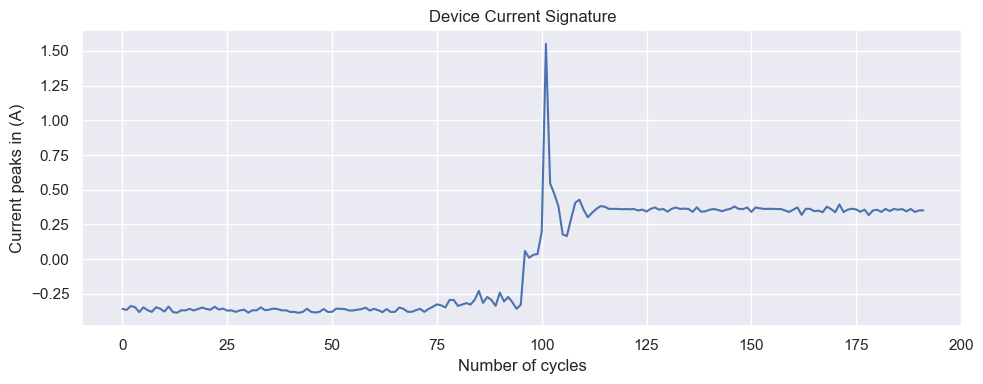

In [30]:
dcs = DCS()

plt.figure(figsize=(10, 4))

sample = dataset[ix]

_, _, features, class_nr = dcs((sample[0], sample[1], None, sample[2]))
plt.title(f'Device Current Signature')
plt.plot(features[0])
plt.xlabel('Number of cycles')
plt.ylabel('Current peaks in (A)')

plt.tight_layout()
plt.savefig('figures/dcs.svg', dpi = 300)
plt.show()

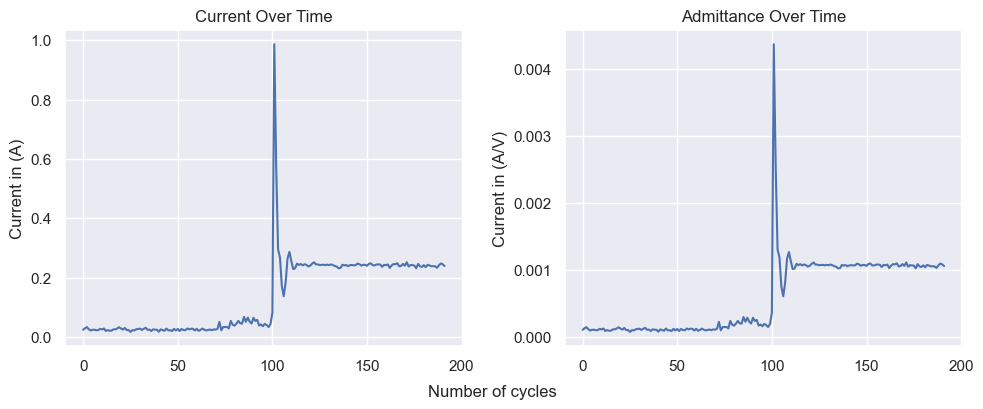

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

cot = COT()
aot = AOT()

sample = dataset[ix]
_, _, features, class_nr = cot((sample[0], sample[1], None, sample[2]))
axes[0].plot(features.squeeze())
axes[0].set_title('Current Over Time')
axes[0].set_ylabel('Current in (A)')

_, _, features, class_nr = aot((sample[0], sample[1], None, sample[2]))
axes[1].plot(features.squeeze())
axes[1].set_title('Admittance Over Time')
axes[1].set_ylabel('Current in (A/V)')

fig.text(0.5, 0, 'Number of cycles', ha='center', va='center')
plt.tight_layout()
plt.savefig('figures/cot_aot.svg', dpi = 300, bbox_extra_artists=(fig,), bbox_inches='tight')
plt.show()

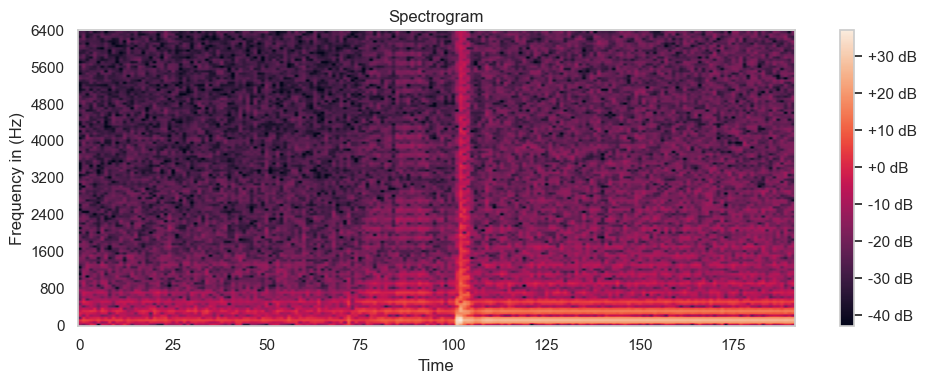

In [32]:
sns.set_style("whitegrid", {'axes.grid' : False})

spec = Spectrogram()

plt.figure(figsize=(10, 4))
plt.title(f'Spectrogram')

sample = dataset[ix]
_, _, features, class_nr = spec((sample[0], sample[1], None, sample[2]))
plt.imshow(librosa.power_to_db(features), origin='lower', aspect='auto')
plt.colorbar(format="%+2.f dB")
plt.ylabel('Frequency in (Hz)')
plt.xlabel('Time')
plt.yticks([0, 16, 32, 48, 64, 80, 96, 112, 128], [0, 800, 1600, 2400, 3200, 4000, 4800, 5600, 6400])
plt.tight_layout()
plt.savefig('figures/spectrogram.svg', dpi = 300, bbox_extra_artists=(fig,), bbox_inches='tight')
plt.show()

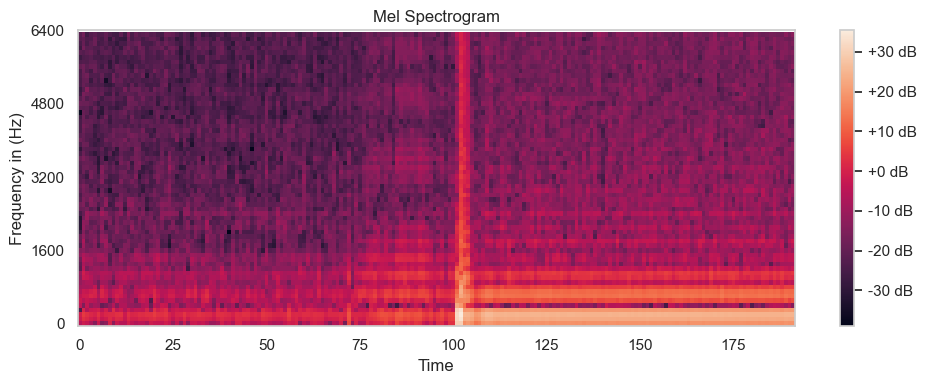

In [33]:
sns.set_style("whitegrid", {'axes.grid' : False})

mel_spec = MelSpectrogram()

plt.figure(figsize=(10, 4))
plt.title(f'Mel Spectrogram')

sample = dataset[ix]
_, _, features, class_nr = mel_spec((sample[0], sample[1], None, sample[2]))
plt.imshow(librosa.power_to_db(features), origin='lower', aspect='auto')
plt.colorbar(format="%+2.f dB")
plt.ylabel('Frequency in (Hz)')
plt.xlabel('Time')
#plt.yticks([0, 16, 32, 48, 64, 80, 96, 112, 128], [0, 800, 1600, 2400, 3200, 4000, 4800, 5600, 6400])
plt.yticks([0, 16, 32, 48, 64], [0, 1600, 3200, 4800, 6400])
plt.tight_layout()
plt.savefig('figures/mel_spectrogram.svg', dpi = 300, bbox_extra_artists=(fig,), bbox_inches='tight')
plt.show()

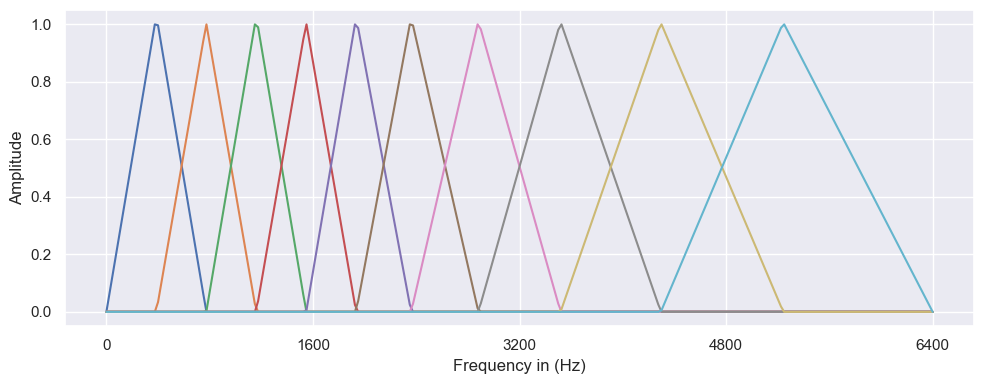

In [34]:
sns.set(rc={'figure.figsize':(10,4)})
sr = 6400
#plt.title('Mel filter banks')
mels = librosa.filters.mel(sr=sr, n_fft=512, n_mels=10,fmin=0, fmax=sr / 2)
mels /= np.max(mels, axis=-1)[:, None]
plt.plot(mels.T)
plt.ylabel('Amplitude')
plt.xlabel('Frequency in (Hz)')
plt.xticks([0, 64, 128, 192, 256], [0, 1600, 3200, 4800, 6400])
plt.tight_layout()
plt.savefig('figures/mel_bank.svg', dpi = 300, bbox_extra_artists=(fig,), bbox_inches='tight')
plt.show()

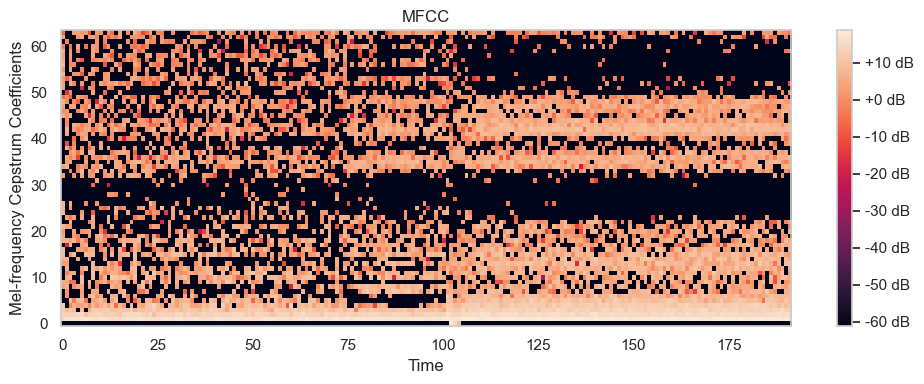

In [35]:
sns.set_style("whitegrid", {'axes.grid' : False})

mfcc = MFCC()

plt.figure(figsize=(10, 4))
plt.title(f'MFCC')

sample = dataset[ix]

_, _, features, class_nr = mfcc((sample[0], sample[1], None, sample[2]))
plt.imshow(librosa.power_to_db(features), origin='lower', aspect='auto')
plt.colorbar(format="%+2.f dB")
plt.ylabel('Mel-frequency Cepstrum Coefficients')
plt.xlabel('Time')
plt.tight_layout()
plt.savefig('figures/mfcc.svg', dpi = 300, bbox_extra_artists=(fig,), bbox_inches='tight')
plt.show()

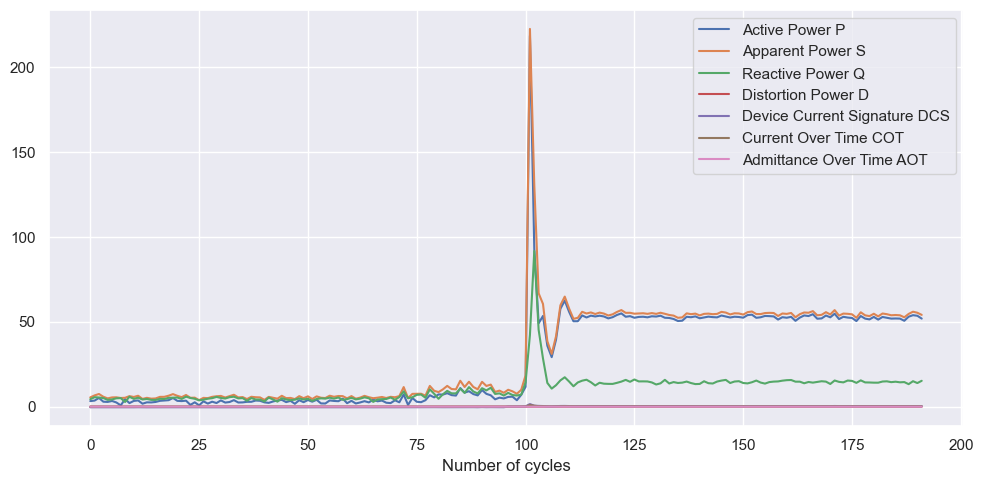

In [37]:
ix = 7998
ac = ACPower()

sns.set(rc={'figure.figsize':(10,4)})
plt.figure(figsize=(10, 5))

sample = dataset[ix]

_, _, features, class_nr = ac((sample[0], sample[1], None, sample[2]))
plt.plot(features[0], label='Active Power P')
plt.plot(features[1], label='Apparent Power S')
plt.plot(features[2], label='Reactive Power Q')
plt.plot(features[3], label='Distortion Power D')
_, _, features, class_nr = dcs((sample[0], sample[1], None, sample[2]))
plt.plot(features[0], label='Device Current Signature DCS')
_, _, features, class_nr = cot((sample[0], sample[1], None, sample[2]))
plt.plot(features[0], label='Current Over Time COT')
_, _, features, class_nr = aot((sample[0], sample[1], None, sample[2]))
plt.plot(features[0], label='Admittance Over Time AOT')
plt.xlabel('Number of cycles')
plt.legend()

plt.tight_layout()
plt.savefig('figures/power_features.png', dpi = 300)
plt.show()